In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [107]:
from utils.load_mnist_1 import *

import numpy as np



In [108]:
print("loaded data set from mnist_1 method")



loaded data set from mnist_1 method


In [109]:
train_images, train_labels = load_images_train_32_32_rgb()
train_labels_str = image_class_to_str(train_labels)

test_images, test_labels = load_images_test_32_32_rgb()
test_lables_str = image_class_to_str(test_labels)



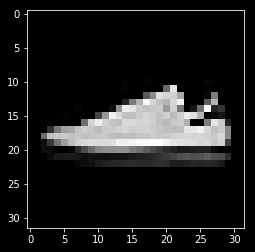

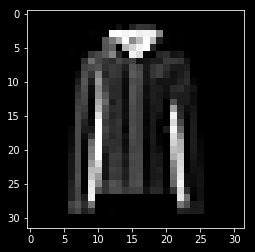

In [110]:
import matplotlib.pyplot as plt 

plt.imshow(train_images[6])
plt.show()

plt.imshow(test_images[6])
plt.show()



In [111]:
# import ResNet and configure it 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.applications import resnet50 as resnet50
from keras.preprocessing import image




In [112]:


# new_model = ResNet50(
#     include_top = False, 
#     weights = 'imagenet', 
#     intput_shape = [32,32,3]
# )


new_model = ResNet50()



(1, 224, 224, 3)


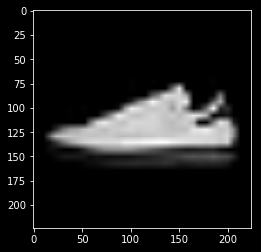

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


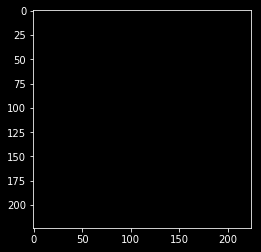

In [113]:

# if we need to resize the image: 
import skimage.transform
    # for each image: 
    # new_image = skimage.transform.resize(image, (299, 299), mode='constant')
    # X_train_reshape.append(new_image)


new_image = skimage.transform.resize(
    train_images[6], 
    (224,224), 
    mode='constant'
)

imgs_in = []
imgs_in.append(new_image) # now this is an array in a list
# make it a array
imgs_in = np.array(imgs_in)
print(imgs_in.shape)
# this will produce (1,224,224,3)

plt.imshow(imgs_in[0])
plt.show()

plt.imshow(resnet50.preprocess_input(imgs_in)[0])
plt.show()

In [114]:
# new_model.predict(new_image.reshape(1,32,32,3))
pred_output = new_model.predict(resnet50.preprocess_input(imgs_in))
# pred_output shape is (1,1000)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', resnet50.decode_predictions(pred_output, top=3)[0])



Predicted: [('n03196217', 'digital_clock', 0.20334612), ('n01930112', 'nematode', 0.06545012), ('n04286575', 'spotlight', 0.052440375)]


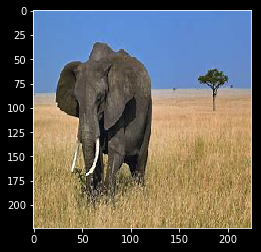

Predicted: [('n02504458', 'African_elephant', 0.68165475), ('n02504013', 'Indian_elephant', 0.18698671), ('n01871265', 'tusker', 0.13085161)]


In [115]:
# predict an elephant 
img_path = "./test_images/th.jpg"
img_elephant = image.load_img(path = img_path,target_size=(224,224))

plt.imshow(img_elephant)
plt.show()


img_elephant = image.img_to_array(img_elephant).astype(int) # (224,224180,3)
img_elephant = np.expand_dims(img_elephant, axis=0) #(1,224,224,3)

# it works with or without this step
# img_elephant = resnet50.preprocess_input(img_elephant)




pred_elephant = new_model.predict(img_elephant)
print('Predicted:', resnet50.decode_predictions(pred_elephant, top=3)[0])